In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
import base64
import os
import numpy as np
import pandas as pd
from urllib import request
from PIL import Image
from IPython import display
import time
import imageio
from tensorflow_docs.vis import embed

In [2]:
datapath = 'dataset/full_emoji.csv'
df = pd.read_csv(datapath)
df.head()

,#,emoji,unicode,name,Apple,Google,Facebook,Windows,Twitter,JoyPixels,Samsung,Gmail,SoftBank,DoCoMo,KDDI
0,1,😀,U+1F600,grinning face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAPAKIFAJh3AP/z...",NaN,NaN,NaN
1,2,😃,U+1F603,grinning face with big eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIFAF5LAP/z...","data:image/png;base64,R0lGODlhDwAPAKIAAP///wAA...","data:image/png;base64,R0lGODlhDAAMAIABAMxm////...","data:image/png;base64,R0lGODlhDgAPALMJAP//mf/M..."
2,3,😄,U+1F604,grinning face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIGAF5LAJh3...","data:image/png;base64,R0lGODlhDwAPAHcAMSH+GlNv...",NaN,NaN
3,4,😁,U+1F601,beaming face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIGAIoAAf/v...","data:image/png;base64,R0lGODlhDwAPAHcAMSH+GlNv...","data:image/png;base64,R0lGODlhDAAMAIABAP+ZAP//...","data:image/png;base64,R0lGODlhDgAPALMIAJmZmf//..."
4,5,😆,U+1F606,grinning squinting face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhEAAMAKIFAF5LAP/z...",NaN,"data:image/png;base64,R0lGODlhDAAMAIABAMxm////...",NaN


In [3]:
def toimg(img_url):
    request.urlretrieve(img_url, 'img')
    img = Image.open('img')
    return img.convert("RGB")

def imgtoarray(img_url):
    try:
        img = toimg(img_url)
        return np.asarray(img, dtype=np.float32)
    except TypeError:
        return None

In [4]:
images = []
for service in ['Apple', 'Google', 'Facebook', 'Windows']:
    for url in df[service].values:
        images.append(imgtoarray(url))
labels = df['name'].to_list()*4
len(images), len(labels)

/opt/homebrew/Caskroom/miniforge/base/envs/cp1/lib/python3.8/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(7264, 7264)

In [5]:
df_new = pd.DataFrame(zip(images, labels), columns=['Image', 'Label'])
df_new.dropna(axis=0, inplace=True)
df_new.reset_index(drop=True, inplace=True)
df_new

,Image,Label
0,"[[[71.0, 112.0, 76.0], [71.0, 112.0, 76.0], [7...",grinning face
1,"[[[71.0, 112.0, 76.0], [71.0, 112.0, 76.0], [7...",grinning face with big eyes
2,"[[[71.0, 112.0, 76.0], [71.0, 112.0, 76.0], [7...",grinning face with smiling eyes
3,"[[[71.0, 112.0, 76.0], [71.0, 112.0, 76.0], [7...",beaming face with smiling eyes
4,"[[[71.0, 112.0, 76.0], [71.0, 112.0, 76.0], [7...",grinning squinting face
...,...,...
6808,"[[[71.0, 112.0, 76.0], [71.0, 112.0, 76.0], [7...",crossed flags
6809,"[[[71.0, 112.0, 76.0], [71.0, 112.0, 76.0], [7...",black flag
6810,"[[[71.0, 112.0, 76.0], [71.0, 112.0, 76.0], [7...",white flag
6811,"[[[71.0, 112.0, 76.0], [71.0, 112.0, 76.0], [7...",rainbow flag


In [6]:
import re
df_new['Label'] = df_new['Label'].apply(lambda x: ''.join(re.findall(r'[ A-Za-z0-9]', x))).values.tolist()


In [7]:
texts = df_new['Label'].values

tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(texts)
word_dic = tokenizer.word_index
vocab_size = len(word_dic)
vocab_size

1683

In [8]:
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences)
Images = np.stack(df_new['Image'].values)
Labels = np.asarray(padded, dtype=np.float32)

Images.shape, Labels.shape

((6813, 72, 72, 3), (6813, 6))

In [9]:
def preprocess_images(images):
    images = images.reshape((images.shape[0], 72, 72, 3)) / 255.
    # return np.where(images > .5, 1.0, 0.0).astype('float32')
    return images.astype('float32')
    

ths_hold = int(Images.shape[0]*0.8)
train_images = Images[:ths_hold, :,:,:]
test_images = Images[ths_hold:, :,:,:]
train_labels = Labels[:ths_hold, :]
test_labels = Labels[ths_hold:, :]

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((5450, 72, 72, 3), (1363, 72, 72, 3), (5450, 6), (1363, 6))

In [10]:
batch_size = 64

In [11]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)
train_dataset

Metal device set to: Apple M1 Max


2022-02-16 16:49:24.181698: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-16 16:49:24.181837: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<BatchDataset shapes: ((None, 72, 72, 3), (None, 6)), types: (tf.float32, tf.float32)>

In [12]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_dataset = test_dataset.shuffle(buffer_size=512).batch(batch_size)
test_dataset

<BatchDataset shapes: ((None, 72, 72, 3), (None, 6)), types: (tf.float32, tf.float32)>

In [13]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [14]:
class CVAE(tf.keras.Model):
    """Convolutional variational autoencoder."""

    def __init__(self, latent_dim, len_text):
        super(CVAE, self).__init__()
        self.emb_dim = 100
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(72, 72, 3)),
                tf.keras.layers.Conv2D(
                    filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
                tf.keras.layers.Conv2D(
                    filters=128, kernel_size=3, strides=(2, 2), activation='relu'),
                tf.keras.layers.Flatten(),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dense(latent_dim + latent_dim),
            ]
        )

        self.decoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(latent_dim+self.emb_dim,)),
                tf.keras.layers.Dense(units=18*18*32, activation=tf.nn.relu),
                tf.keras.layers.Reshape(target_shape=(18, 18, 32)),
                tf.keras.layers.Conv2DTranspose(
                    filters=128, kernel_size=3, strides=2, padding='same',
                    activation='relu'),
                tf.keras.layers.Conv2DTranspose(
                    filters=64, kernel_size=3, strides=2, padding='same',
                    activation='relu'),
                # No activation
                tf.keras.layers.Conv2DTranspose(
                    filters=3, kernel_size=3, strides=1, padding='same'),
            ]
        )
        
        self.word_embbeding = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(len_text,)),
                tf.keras.layers.Embedding(vocab_size, 300, input_length=len_text),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(self.emb_dim),
            ]
        )
        
    @tf.function
    def predict(self, y_texts):
        word_vec = self.word_embbeding(y_texts)
        eps = tf.random.normal(shape=(len(y_texts), self.latent_dim))
        z = tf.concat([eps, word_vec], axis=1)
        return self.decode(z, apply_sigmoid=True)
    
    @tf.function
    def sample(self, eps=None):
        if eps is None:
            eps = tf.random.normal(shape=(100, self.latent_dim+self.len_text))
        return self.decode(eps, apply_sigmoid=True)

    def encode(self, x):
        mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
        return mean, logvar

    def reparameterize(self, mean, logvar):
        eps = tf.random.normal(shape=mean.shape)
        return eps * tf.exp(logvar * .5) + mean
    
    @tf.function
    def decode(self, z, apply_sigmoid=False):
        logits = self.decoder(z)
        if apply_sigmoid:
            probs = tf.sigmoid(logits)
            return probs
        return logits

In [15]:
optimizer = tf.keras.optimizers.Adam(1e-4)

def log_normal_pdf(sample, mean, logvar, raxis=1):
    log2pi = tf.math.log(2. * np.pi)
    return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)


def compute_loss(model, x, x_text):
    mean, logvar = model.encode(x)
    z = model.reparameterize(mean, logvar)
    x_text = tf.cast(x_text, dtype='float32')
    x_text = tf.reshape(x_text, [-1,6])
    word_vec = model.word_embbeding(x_text)
    z_ = tf.concat([z, word_vec], axis=1)
    x_logit = model.decode(z_)
    x_logit = tf.cast(x_logit, dtype='float64')
    cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
    logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
    logpx_z = tf.cast(logpx_z, dtype='float32')
    logpz = log_normal_pdf(z, 0., 0.)
    logqz_x = log_normal_pdf(z, mean, logvar)
    return -tf.reduce_mean(logpx_z + logpz - logqz_x)


@tf.function
def train_step(model, x, x_text, optimizer):
    """Executes one training step and returns the loss.

    This function computes the loss and gradients, and uses the latter to
    update the model's parameters.
    """
    with tf.GradientTape() as tape:
        loss = compute_loss(model, x, x_text)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [16]:
epochs = 1000
# set the dimensionality of the latent space to a plane for visualization later
latent_dim = 4
num_examples_to_generate = 10
len_text = 6

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = CVAE(latent_dim, len_text)

In [17]:
def predict_and_save_images(model, epoch, y_text):
    test_seq = tokenizer.texts_to_sequences(y_text)
    test_pad = pad_sequences(test_seq, maxlen=6)
    test_pad = tf.cast(test_pad, dtype='float32')
    predictions = model.predict(test_pad)
    fig = plt.figure(figsize=(15,15))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(np.asarray(predictions[i, :, :, :]*255, dtype=np.int32))
        plt.xlabel(y_text[i])

    # tight_layout minimizes the overlap between 2 sub-plots
    plt.savefig('./vae_imgs/image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [18]:
test = ['smiling face with angry eyes', 'cold face', 'grinning face', 'winking face with tongue', 
        'fearful face with spiral eyes', 'sleepy face', 'screaming face with tongue', 'angry face', 
        'grinning face in clouds', 'hot zipper mouth face', 'vommiting poo', 'nerd face', 
       'beaming face with hearts', 'shushing poo', 'sad face with cowboy hat', 'flushed face with sunglasses']

Epoch: 1000, Test set ELBO: -12237.8125, time elapse for current epoch: 4.3341779708862305


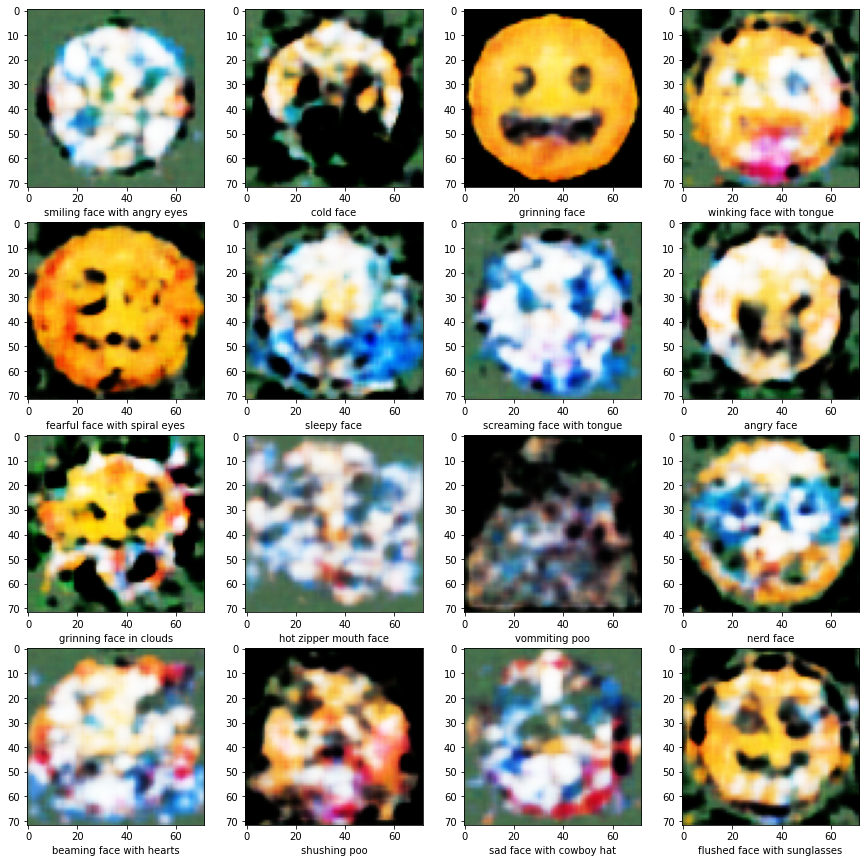

In [19]:
predict_and_save_images(model, 0, test)

for epoch in range(1, epochs + 1):
    start_time = time.time()
    for img, label in train_dataset:
        img = tf.cast(img, dtype='float64')
        train_step(model, img, label, optimizer)
    end_time = time.time()

    loss = tf.keras.metrics.Mean()
    for img, label in test_dataset:
        img = tf.cast(img, dtype='float64')
        loss(compute_loss(model, img, label))
    elbo = -loss.result()
    display.clear_output(wait=False)
    print('Epoch: {}, Test set ELBO: {}, time elapse for current epoch: {}'
        .format(epoch, elbo, end_time - start_time))
    predict_and_save_images(model, epoch, test)